Alumna: Maria Alejandra Del Porto

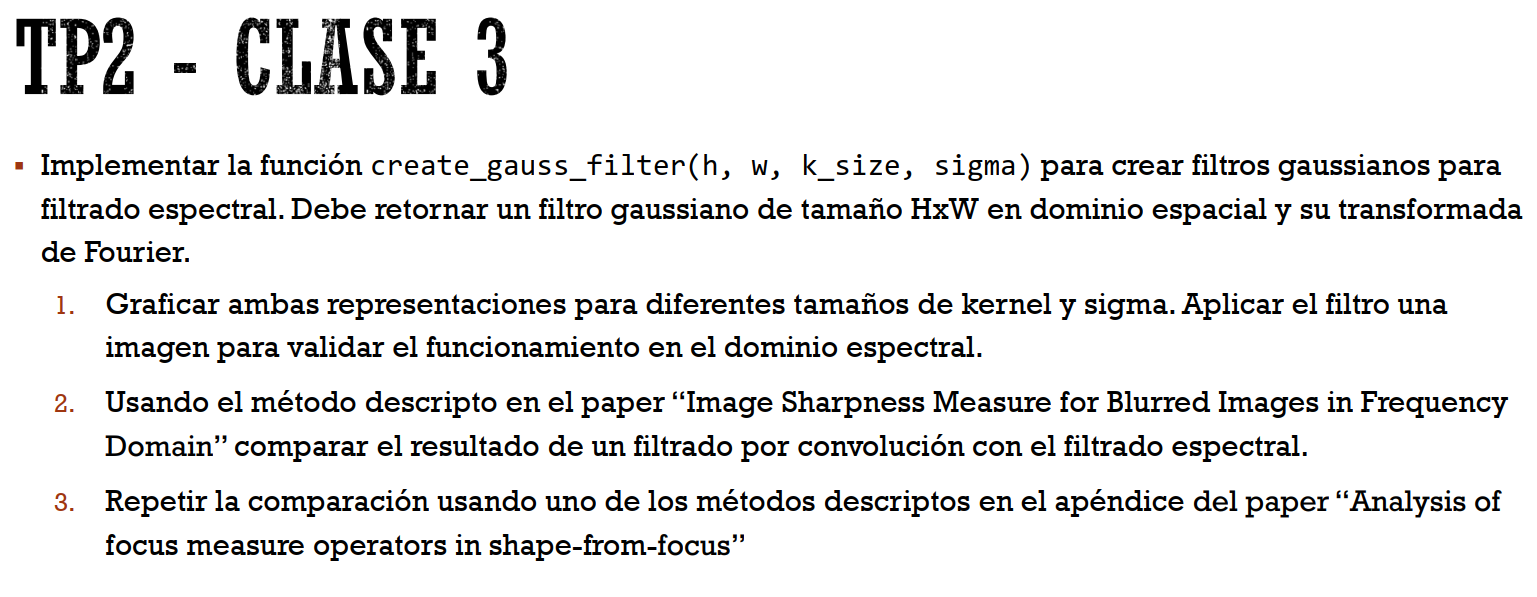

### Importaciones

In [18]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#from skimage.util import random_noise

In [12]:
def create_gauss_filter(h, w, k_size, sigma):

    nucleo_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernel_space = nucleo_g * nucleo_g.T
    kernel_freq = np.fft.fft2(kernel_space)

    return kernel_space, kernel_freq
     

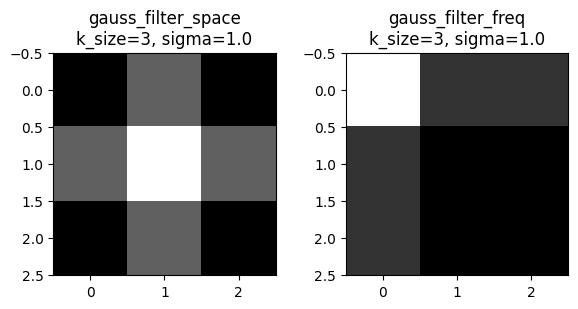

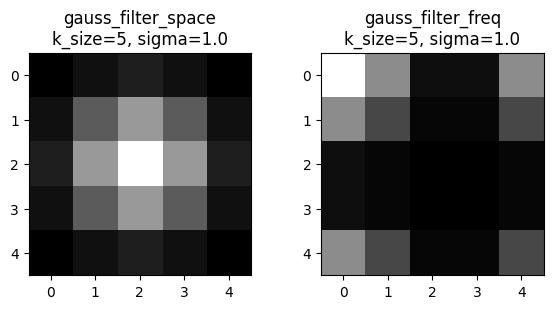

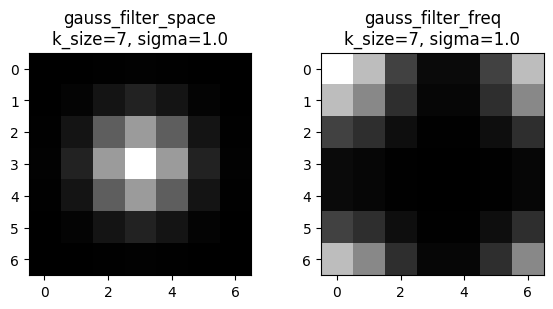

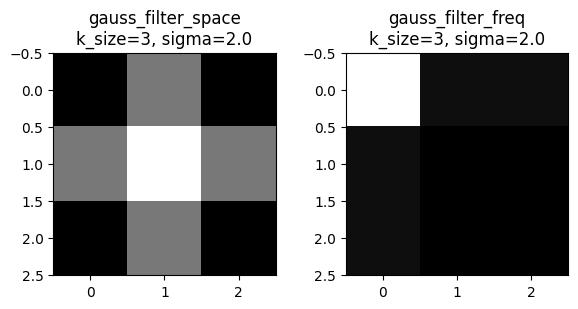

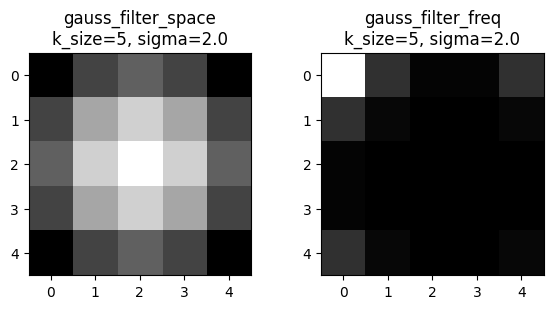

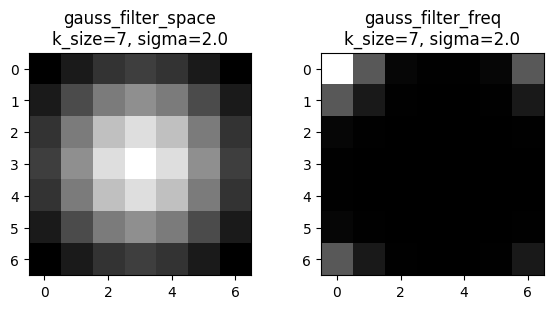

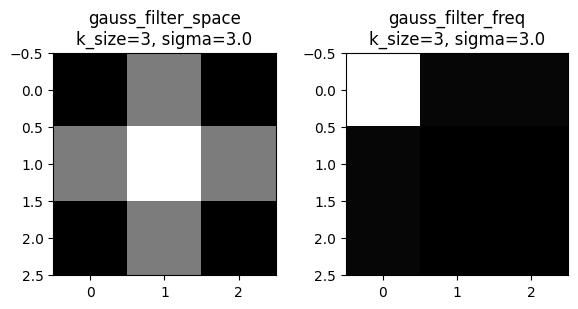

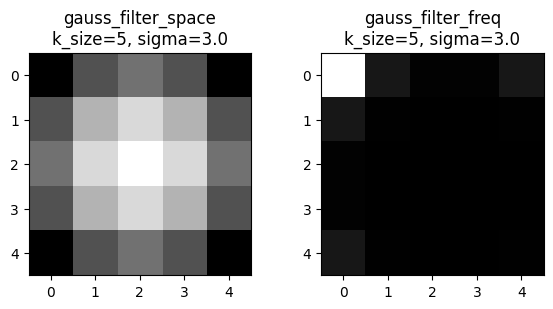

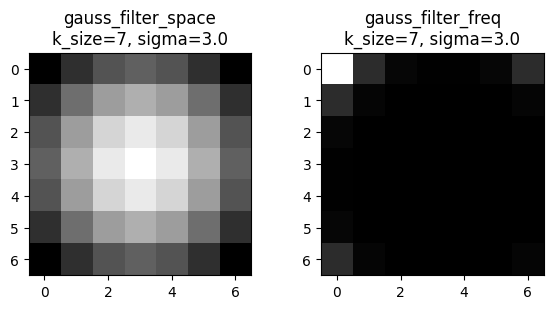

In [36]:
# Parámetros
height, width = 256, 256
sigma_values = [1.0, 2.0, 3.0]
k_size_values = [3, 5, 7]

# Generar y visualizar filtros y resultados
for sigma in sigma_values:
    for k_size in k_size_values:
        # Crear filtro gaussiano
        gauss_filter_space, gauss_filter_freq = create_gauss_filter(height, width, k_size, sigma)

        # Visualizar el filtro gaussiano en el dominio espacial
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(gauss_filter_space, cmap='gray')
        plt.title(f'gauss_filter_space\nk_size={k_size}, sigma={sigma}')

        # Visualizar la transformada de Fourier del filtro gaussiano
        plt.subplot(1, 2, 2)
        plt.imshow(np.log(1 + np.abs(gauss_filter_freq)), cmap='gray')
        plt.title(f'gauss_filter_freq\nk_size={k_size}, sigma={sigma}')

        plt.tight_layout()
        plt.show()


In [ ]:
kernel_space, kernel_freq 

### borrar despues

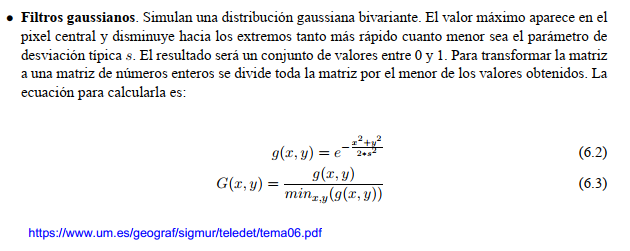

In [8]:
def create_gauss_filter(h, w, k_size, sigma):

    # Cálculo sigma si el proporcionado es negativo
    if sigma <= 0:
        sigma = 0.3 * (((k_size - 1) * 0.5) - 1) + 0.8

    # Crear un filtro gaussiano en el dominio espacial
    filter_space = np.zeros((h, w))
    center_h, center_w = h // 2, w // 2

    for i in range(h):
        for j in range(w):
            distance = ((i - center_h) ** 2 + (j - center_w) ** 2) / (2 * sigma ** 2)
            filter_space[i, j] = np.exp(-distance)

    # Normalizar el filtro
    filter_space /= np.min(filter_space)

    # Convertir la matriz a números enteros
    filter_space = (filter_space * 255).astype(np.uint8)

    # Calcular la transformada de Fourier del filtro espacial
    filter_freq = fftshift(fft2(filter_space))

    return filter_space, filter_freq


In [ ]:

def apply_filter(img, filter_freq):
    # Calcular la transformada de Fourier de la imagen
    img_freq = fftshift(fft2(img))

    # Aplicar el filtro en el dominio espectral
    img_filtered_freq = img_freq * filter_freq

    # Calcular la inversa de la transformada de Fourier para obtener la imagen filtrada
    img_filtered = np.abs(ifft2(fftshift(img_filtered_freq)))

    return img_filtered

def plot_filter_and_result(filter_space, filter_freq, img, img_filtered):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(filter_space, cmap='gray')
    plt.title('Filtro Gaussiano en el Dominio Espacial')

    plt.subplot(2, 3, 2)
    plt.imshow(np.log(1 + np.abs(filter_freq)), cmap='gray')
    plt.title('Transformada de Fourier del Filtro')

    plt.subplot(2, 3, 3)
    plt.imshow(img, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(2, 3, 4)
    plt.imshow(np.log(1 + np.abs(fftshift(fft2(img)))), cmap='gray')
    plt.title('Transformada de Fourier de la Imagen Original')

    plt.subplot(2, 3, 5)
    plt.imshow(img_filtered, cmap='gray')
    plt.title('Imagen Filtrada en el Dominio Espacial')

    plt.subplot(2, 3, 6)
    plt.imshow(np.log(1 + np.abs(fftshift(fft2(img_filtered)))), cmap='gray')
    plt.title('Transformada de Fourier de la Imagen Filtrada')

    plt.tight_layout()
    plt.show()

# Parámetros
height, width = 256, 256
sigma_values = [1.0, 2.0, 3.0]
k_size_values = [3, 5, 7]

# Generar y visualizar filtros y resultados
for sigma in sigma_values:
    for k_size in k_size_values:
        # Crear filtro gaussiano
        gauss_filter_space, gauss_filter_freq = create_gauss_filter(height, width, k_size, sigma)

        # Aplicar filtro a una imagen de ejemplo
        example_image = np.random.rand(height, width)  # Una imagen de ruido aleatorio para el ejemplo
        filtered_image = apply_filter(example_image, gauss_filter_freq)

        # Mostrar resultados
        plot_filter_and_result(gauss_filter_space, gauss_filter_freq, example_image, filtered_image)
